# Best States to Live In

##### 	In this project analysis, I have set out to find the best states within the United States to live in. These rankings derive from the best-states.csv dataset provided by the U.S News. In addition, I  used a dataset from the World Population Review containing the states with these lowest cost of living. This dataset is summarized of 6 different categories combined into a rank.  Eight different categories with 71 different metrics from the best-states dataset were used to find out which states are most accommodating for their residents. With over 65,000 people participating in a survey taken over 3 years (2017, 2019, 2021), weights were assigned based on what residents prioritized in these categories in their states. 
##### The data obtained from the U.S. News includes the raw values for each state determining the metric-level results. A z- score distribution was used to assess the averages among states for each metric. An index score was created for each metric and state. The state that performed the best was given 100 points while the ladder received none. States that lay between these two were indexed accordingly. After obtaining the index scores for each metric, the average of these scores were used to determine subcategory  scores and again, with those scores, used to determine category scores. 
##### 	With these scores, I created a pie graph to display the overall weight each category help.  I then used a function that would add up the scores for each category in each state and then divided this score by 100 to get the overall score for each state. After getting the overall totals for these categories, I then took the mean of weighted cost rank and the weighted totals to get the final overall scores for each state and then sorted these totals. These states with the lowest value rank as the top states. States with a larger value rank further down. With this information I had three questions to ask. 
##### What are the top 5/ bottom 5 states to live in according to each factor?
##### What are the top 5 states to live in overall?
##### What are the top 5 states to live in according to the factors I find most important? (Health Care, Education, Crime, and Natural Environment)



In [11]:
#dependencies and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
#csv files to read
best_states = r"C:\Users\marie\Documents\KU_Bootcamp\Project1\BestStates.csv"
cheapest_states = r"C:\Users\marie\Documents\KU_Bootcamp\Project1\CheapestStates.csv"

#read the best states file
best_states_df = pd.read_csv(best_states)
best_states_df

,State,Health Care,Education,Economy,Infrastructure,Opportunity,Fiscal Stability,Crime & Corrections,Natural Environment
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Washington,4.0,4.0,3.0,2.0,19.0,22.0,15.0,14.0
3,New Hampshire,16.0,5.0,13.0,31.0,1.0,10.0,1.0,4.0
4,Minnesota,10.0,17.0,18.0,6.0,3.0,25.0,16.0,3.0
5,Utah,9.0,10.0,2.0,3.0,24.0,5.0,12.0,49.0
6,Vermont,11.0,8.0,29.0,28.0,10.0,19.0,2.0,7.0
7,Maryland,8.0,13.0,26.0,21.0,5.0,15.0,22.0,25.0
8,Virginia,18.0,7.0,25.0,35.0,9.0,8.0,9.0,18.0
9,Massachusetts,2.0,1.0,7.0,44.0,29.0,30.0,4.0,26.0


In [13]:
#we need to clean up the data and get rid of NaN
best_states_df = best_states_df.dropna()
best_states_df

,State,Health Care,Education,Economy,Infrastructure,Opportunity,Fiscal Stability,Crime & Corrections,Natural Environment
2,Washington,4.0,4.0,3.0,2.0,19.0,22.0,15.0,14.0
3,New Hampshire,16.0,5.0,13.0,31.0,1.0,10.0,1.0,4.0
4,Minnesota,10.0,17.0,18.0,6.0,3.0,25.0,16.0,3.0
5,Utah,9.0,10.0,2.0,3.0,24.0,5.0,12.0,49.0
6,Vermont,11.0,8.0,29.0,28.0,10.0,19.0,2.0,7.0
7,Maryland,8.0,13.0,26.0,21.0,5.0,15.0,22.0,25.0
8,Virginia,18.0,7.0,25.0,35.0,9.0,8.0,9.0,18.0
9,Massachusetts,2.0,1.0,7.0,44.0,29.0,30.0,4.0,26.0
10,Nebraska,27.0,6.0,21.0,9.0,15.0,7.0,24.0,27.0
11,Colorado,12.0,11.0,1.0,8.0,28.0,29.0,29.0,31.0


In [14]:
#read the next dataset
cheapest_states_df = pd.read_csv(cheapest_states)
cheapest_states_df

,State,costIndex,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,Mississippi,86.1,1,91.6,70.1,89.1,89.2,91.4
1,Arkansas,86.9,2,92.0,73.9,91.8,83.6,85.6
2,Oklahoma,87.0,3,95.4,71.9,94.1,89.5,93.2
3,Missouri,87.1,4,96.6,70.6,99.6,87.3,95.7
4,New Mexico,87.5,5,100.9,77.7,87.9,91.6,100.1
5,Tennessee,88.7,6,93.3,80.2,93.4,89.7,88.5
6,Michigan,88.9,7,89.3,75.2,97.3,97.4,93.0
7,Kansas,89.0,8,91.9,73.8,103.0,92.3,98.9
8,Georgia,89.2,9,96.9,73.8,92.4,97.6,98.5
9,Wyoming,89.3,10,98.7,72.3,87.3,99.3,94.9


In [15]:
#list column names
cheapest_states_df.columns

Index(['State', 'costIndex', 'costRank', 'groceryCost', 'housingCost',
       'utilitiesCost', 'transportationCost', 'miscCost'],
      dtype='object')

In [16]:
#reorganize dataset
cheapest_states_cleaned = cheapest_states_df.drop(['costIndex','utilitiesCost', 'miscCost'], axis=1)
cheapest_states_renamed = cheapest_states_cleaned.rename(columns={"costRank":"Cost Rank", "groceryCost":"Grocery Cost", 
                                                                  "housingCost":"Housing Cost", 
                                                                  "transportationCost":"Transportation Cost"})
cheapest_states_renamed

,State,Cost Rank,Grocery Cost,Housing Cost,Transportation Cost
0,Mississippi,1,91.6,70.1,89.2
1,Arkansas,2,92.0,73.9,83.6
2,Oklahoma,3,95.4,71.9,89.5
3,Missouri,4,96.6,70.6,87.3
4,New Mexico,5,100.9,77.7,91.6
5,Tennessee,6,93.3,80.2,89.7
6,Michigan,7,89.3,75.2,97.4
7,Kansas,8,91.9,73.8,92.3
8,Georgia,9,96.9,73.8,97.6
9,Wyoming,10,98.7,72.3,99.3


In [17]:
#merge dataframes
combined_states_df = pd.merge(best_states_df, cheapest_states_renamed, how='inner', on='State')
combined_states_df

,State,Health Care,Education,Economy,Infrastructure,Opportunity,Fiscal Stability,Crime & Corrections,Natural Environment,Cost Rank,Grocery Cost,Housing Cost,Transportation Cost
0,Washington,4.0,4.0,3.0,2.0,19.0,22.0,15.0,14.0,38,107.8,117.8,121.7
1,New Hampshire,16.0,5.0,13.0,31.0,1.0,10.0,1.0,4.0,37,100.4,110.3,111.4
2,Minnesota,10.0,17.0,18.0,6.0,3.0,25.0,16.0,3.0,31,106.7,88.3,103.7
3,Utah,9.0,10.0,2.0,3.0,24.0,5.0,12.0,49.0,27,98.5,93.6,108.6
4,Vermont,11.0,8.0,29.0,28.0,10.0,19.0,2.0,7.0,39,111.3,126.7,119.9
5,Maryland,8.0,13.0,26.0,21.0,5.0,15.0,22.0,25.0,44,108.5,184.5,116.7
6,Virginia,18.0,7.0,25.0,35.0,9.0,8.0,9.0,18.0,30,96.1,108.0,88.1
7,Massachusetts,2.0,1.0,7.0,44.0,29.0,30.0,4.0,26.0,46,113.9,170.3,116.0
8,Nebraska,27.0,6.0,21.0,9.0,15.0,7.0,24.0,27.0,14,95.5,80.9,94.3
9,Colorado,12.0,11.0,1.0,8.0,28.0,29.0,29.0,31.0,33,102.5,119.0,101.2


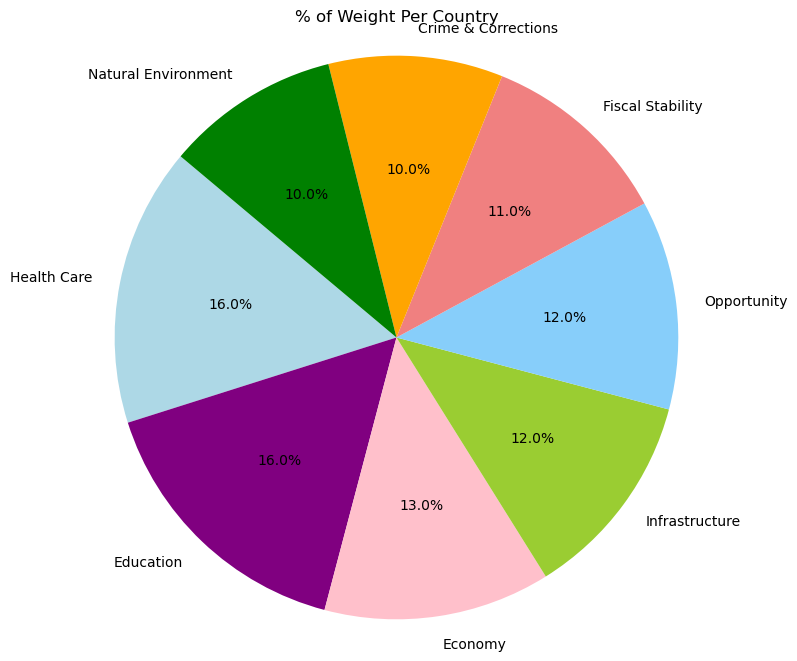

In [20]:
#we need to find the weighted scores of the best states categories
#make a pie chart showing each categories weights
labels = 'Health Care', 'Education', 'Economy', 'Infrastructure', 'Opportunity', 'Fiscal Stability', 'Crime & Corrections', 'Natural Environment'
sizes = [16, 16, 13, 12, 12, 11, 10, 10]
colors = ["lightblue", "purple", "pink", "yellowgreen","lightskyblue", "lightcoral", "orange", "green"]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("% of Weight Per Country")
plt.axis("equal")
plt.savefig("../Images")

plt.show()

In [19]:
#create new columns for these totals
combined_states_df['Health Care Total'] = combined_states_df['Health Care']*16
combined_states_df['Education Total'] = combined_states_df['Education']*16
combined_states_df['Economy Total'] = combined_states_df['Economy']*13
combined_states_df['Infrastructure Total'] = combined_states_df['Infrastructure']*12
combined_states_df['Opportunity Total'] = combined_states_df['Opportunity']*12
combined_states_df['Fiscal Stability Total'] = combined_states_df['Fiscal Stability']*11
combined_states_df['Crime Total'] = combined_states_df['Crime & Corrections']*10
combined_states_df['Natural Environment Total'] = combined_states_df['Natural Environment']*10

#combine all of the weighted totals
#create a new column for these totals
combined_states_df['Weighted Totals'] = (combined_states_df.loc[:, 'Health Care Total':'Natural Environment Total'].sum(axis=1))/100

#find the average between cost rank and the weighted total
combined_states_df['Overall Totals'] = combined_states_df[['Cost Rank', 'Weighted Totals']].mean(axis=1)
combined_states_df.sort_values(by=['Overall Totals'])


,State,Health Care,Education,Economy,Infrastructure,Opportunity,Fiscal Stability,Crime & Corrections,Natural Environment,Cost Rank,...,Health Care Total,Education Total,Economy Total,Infrastructure Total,Opportunity Total,Fiscal Stability Total,Crime Total,Natural Environment Total,Weighted Totals,Overall Totals
27,Missouri,41.0,27.0,23.0,25.0,11.0,16.0,44.0,9.0,4,...,656.0,432.0,299.0,300.0,132.0,176.0,440.0,90.0,25.25,14.625
8,Nebraska,27.0,6.0,21.0,9.0,15.0,7.0,24.0,27.0,14,...,432.0,96.0,273.0,108.0,180.0,77.0,240.0,270.0,16.76,15.380
16,Georgia,39.0,30.0,11.0,10.0,21.0,9.0,27.0,20.0,9,...,624.0,480.0,143.0,120.0,252.0,99.0,270.0,200.0,21.88,15.440
21,Kansas,33.0,15.0,36.0,7.0,16.0,35.0,32.0,8.0,8,...,528.0,240.0,468.0,84.0,192.0,385.0,320.0,80.0,22.97,15.485
13,Iowa,20.0,9.0,32.0,23.0,2.0,17.0,19.0,32.0,13,...,320.0,144.0,416.0,276.0,24.0,187.0,190.0,320.0,18.77,15.885
29,Tennessee,43.0,35.0,12.0,13.0,26.0,1.0,43.0,37.0,6,...,688.0,560.0,156.0,156.0,312.0,11.0,430.0,370.0,26.83,16.415
32,Michigan,24.0,37.0,19.0,41.0,14.0,27.0,35.0,29.0,7,...,384.0,592.0,247.0,492.0,168.0,297.0,350.0,290.0,28.20,17.600
30,Wyoming,42.0,16.0,42.0,15.0,22.0,39.0,17.0,17.0,10,...,672.0,256.0,546.0,180.0,264.0,429.0,170.0,170.0,26.87,18.435
3,Utah,9.0,10.0,2.0,3.0,24.0,5.0,12.0,49.0,27,...,144.0,160.0,26.0,36.0,288.0,55.0,120.0,490.0,13.19,20.095
15,Idaho,26.0,33.0,6.0,29.0,35.0,11.0,8.0,15.0,19,...,416.0,528.0,78.0,348.0,420.0,121.0,80.0,150.0,21.41,20.205


# What are the top 5/ bottom 5 states to live in according to each factor?

### Health Care

In [ ]:
#pull just the state name and the health care weighted total
health_care = combined_states_df[['State', 'Health Care Total']]
health_care_rank = health_care.sort_values('Health Care Total')
health_care_rank.head()

In [ ]:
#plot the top states in healthcare using a bar graph
states = ["Hawaii", "Massachusetts", "Connecticut", "Washington", "Rhode Island"]
health_total = [18.0, 36.0, 54.0, 72.0, 90.0]
x_axis = np.arange(len(health_total))
plt.bar(x_axis, health_total, color="b", align="center")
plt.title("States With the Best Health Care")
plt.xlabel("States")
plt.ylabel("Health Care Scores")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states)

plt.show

In [ ]:
health_care_rank.tail()

### Education

In [ ]:
#pull just the state name and the education weighted total
education = combined_states_df[['State', 'Education Total']]
education_rank = education.sort_values('Education Total')
education_rank.head()

In [ ]:
education_rank.tail()

In [ ]:
#plot the findings for education using a line graph
states = ["Massachusetts", "New Jersey", "Florida", "Washington", "New Hampshire"]
education_total = [18.0, 36.0, 54.0, 72.0, 90.0]
x_axis = np.arange(len(education_total))
plt.bar(x_axis, education_total, color="b", align="center")
plt.title("States With the Best Education")
plt.xlabel("States")
plt.ylabel("Education Scores")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states)

plt.show

### Economy

In [ ]:
#pull just the state name and the economy weighted total
economy = combined_states_df[['State', 'Economy Total']]
economy_rank = economy.sort_values('Economy Total')
economy_rank.head()

In [ ]:
economy_rank.tail()

### Opportunity

In [ ]:
#pull just the state name and the opportunity weighted total
opportunity = combined_states_df[['State', 'Opportunity Total']]
opportunity_rank = opportunity.sort_values('Opportunity Total')
opportunity_rank.head()

In [ ]:
opportunity_rank.tail()

### Fiscal Stability

In [ ]:
#pull just the state name and the fiscal stability weighted total
fiscal_stability = combined_states_df[['State', 'Fiscal Stability Total']]
fiscal_stability_rank = fiscal_stability.sort_values('Fiscal Stability Total')
fiscal_stability_rank.head()

In [ ]:
fiscal_stability_rank.tail()

### Crime & Corrections

In [ ]:
#pull just the state name and the crimes weighted total
crime_corrections = combined_states_df[['State', 'Crime Total']]
crime_corrections_rank = crime_corrections.sort_values('Crime Total')
crime_corrections_rank.head()

In [ ]:
crime_corrections_rank.tail()

### Infrastructure

In [ ]:
#pull just the state name and the infrastructure weighted total
infrastructure = combined_states_df[['State', 'Infrastructure Total']]
infrastructure_rank = infrastructure.sort_values('Infrastructure Total')
infrastructure_rank.head()

In [ ]:
infrastructure_rank.tail()

### Natural Environments

In [ ]:
#pull just the state name and the natural environments weighted total
natural_environment = combined_states_df[['State', 'Natural Environment Total']]
natural_environment_rank = natural_environment.sort_values('Natural Environment Total')
natural_environment_rank.head()

In [ ]:
natural_environment_rank.tail()

### Cost of Living

In [ ]:
cost_of_living = combined_states_df[['State', 'Cost Rank']]
cost_rank = cost_of_living.sort_values('Cost Rank')
cost_rank.head()

In [ ]:
cost_rank.tail()

# What are the top 5 states to live in overall?

In [ ]:
#pull states and overall totals
overall_rank = combined_states_df[['State', 'Overall Totals']]
overall_states_rank = overall_rank.sort_values('Overall Totals')
overall_states_rank

In [ ]:
overall_states_rank.tail()

# What are the top 5 states to live in according to the factors I find most important? (Health Care, Education, Crime, and Natural Environment)

In [ ]:
combined_states_df.columns

In [ ]:
#create a dataframe with only these factors
combined_states_df.columns
personal_rank = combined_states_df.drop(['Health Care', 'Education', 'Economy', 'Opportunity',
       'Fiscal Stability', 'Crime & Corrections', 'Natural Environment',
       'Grocery Cost', 'Housing Cost', 'Transportation Cost', 'Economy Total',
       'Opportunity Total', 'Fiscal Stability Total', 'Weighted Totals', 'Overall Totals'], axis=1)
personal_rank

In [ ]:
#combine weighted totals
personal_rank['Personal Weighted Totals'] = (personal_rank.loc[:, 'Health Care Total':'Crime Total'].sum(axis=1))/100
personal_rank

In [ ]:
#find the average between cost rank and the personal weighted total
personal_rank['Personal Overall Totals'] = personal_rank[['Cost Rank', 'Personal Weighted Totals']].mean(axis=1)
personal_rank.sort_values(by=['Personal Overall Totals'])
personal_rank

In [ ]:
#pull just the states and personal overall total
personal_overall = personal_rank[['State', 'Personal Overall Totals']]
personal_overall_rank = personal_overall.sort_values('Personal Overall Totals')
personal_overall_rank.head()